## Introduction

In this notebook, we will build a simple machine learning model to Predict diabetes diagnosis using a Kaggle dataset.  
The dataset contains basic medical and lifestyle features, making it a suitable starting point for learning applied machine learning in healthcare.  

This notebook is designed for **educational purposes**:  
- To help students understand the end-to-end workflow of machine learning.  
- To demonstrate how real-world health data can be analyzed and modeled.  
- To provide hands-on experience with data exploration, preprocessing, model training, and evaluation.  

📌 **Context**:  
This notebook is part of the workshop **"Introduction to Machine Learning for Bioinformatics"**, presented by **Matin Ghasemi** at the **Student Symposium of the 3rd International Edition and 12th Iranian Conference on Bioinformatics**.  

## 1. Data Overview
Take the first look at the dataset: understand the shape, column names, data types, missing values, and a few sample rows.  
*(Goal: Get familiar with the dataset before analysis.)*

### Dataset
The original dataset is publicly available on Kaggle:  
https://www.kaggle.com/datasets/samira1992/diabetes-intermediate-dataset

#### Diabetes Dataset - Column Descriptions
| Column Name                 | Data Type      | Description                                                                          |
|-----------------------------|----------------|--------------------------------------------------------------------------------------|
| Pregnancies                 | Numeric        | Number of times the patient has been pregnant.                                       |
| Glucose                     | Numeric        | Plasma glucose concentration measured 2 hours after an oral glucose tolerance test.  |
| BloodPressure               | Numeric        | Diastolic blood pressure measured in mmHg.                                           |
| SkinThickness               | Numeric        | Triceps skinfold thickness measured in millimeters.                                  |
| Insulin                     | Numeric        | Serum insulin level measured 2 hours after glucose intake (µU/mL).                   |
| BMI                         | Numeric        | Body Mass Index, calculated as weight (kg) divided by height squared (m²).           |
| DDiabetesPedigreeFunction   | Numeric        | A score estimating genetic predisposition to diabetes based on family history.       |
| Age                         | Numeric        | Age of the patient in years.                                                         |
| Outcome                     | Categorical    | Diabetes diagnosis (1 = diabetic, 0 = non‑diabetic).                                 |

### Importing libraies

In [48]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

### Read data and getting familiar with it

In [5]:
df = pd.read_csv('./data/diabetes_dataset.csv')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
print(f"Dataset Shape: {df.shape}")
print(f"Number of patients: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Dataset Shape: (768, 9)
Number of patients: 768
Number of features: 9


In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Missing Values \
This sample dataset is clean but in real-world scenarios, data cleaning and handling missing values are crucial steps.

In [11]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 2. Exploratory Data Analysis (EDA)
Explore the dataset using summary statistics and visualizations. Look for distributions, correlations, and patterns between features and the target variable.  
*(Goal: Gain insights and detect potential data issues or trends.)*

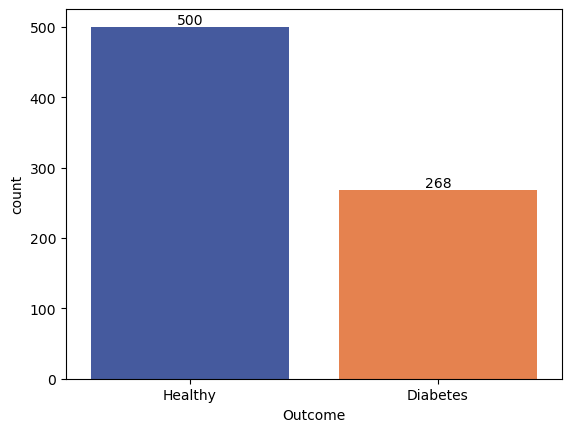

In [ ]:
ax = sns.countplot(
    x='Outcome',
    data=df,
    palette=['#3652AD', '#FE7A36']
)
for container in ax.containers:
    ax.bar_label(container)

ax.set_xticklabels(['Healthy', 'Diabetic'])

plt.show()

Correlation Matrix


Correlation Matrix:


<Axes: >

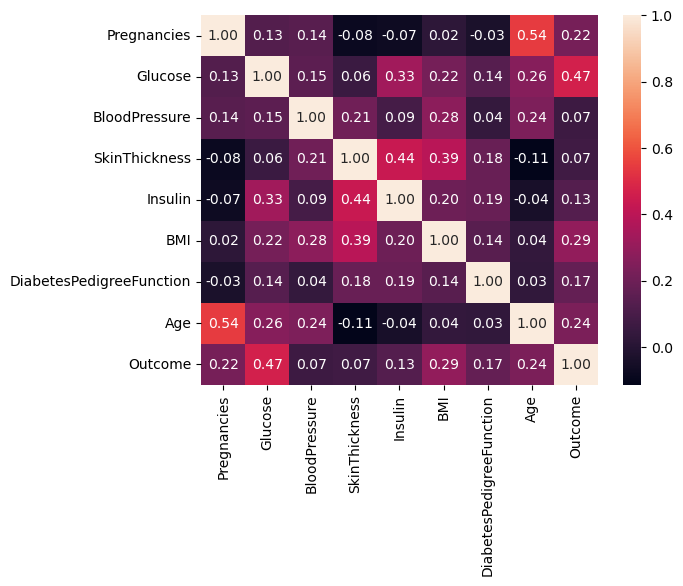

In [16]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
print("\nCorrelation Matrix:")
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
)

Mutual Information

In [ ]:
X = df.drop(columns='Outcome')
y = df['Outcome']

mi_scores = mutual_info_classif(
    X, 
    y,
    discrete_features=False,
    random_state=42
)

mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi_scores
})

mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)
mi_df

,Feature,Mutual Information
1,Glucose,0.114634
5,BMI,0.080061
0,Pregnancies,0.060985
7,Age,0.051395
6,DiabetesPedigreeFunction,0.014590
4,Insulin,0.011948
3,SkinThickness,0.004667
2,BloodPressure,0.000000


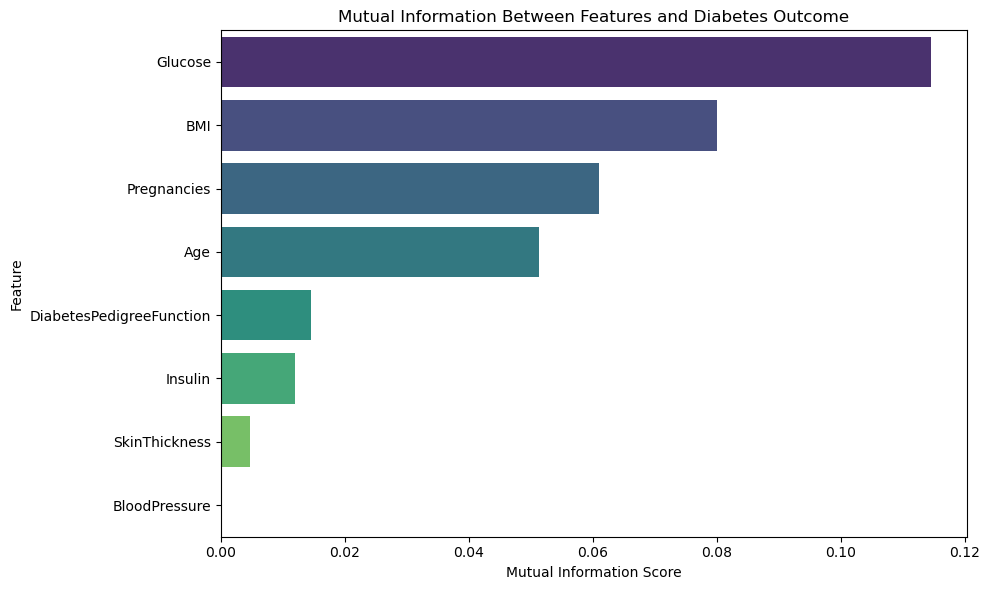

In [50]:
plt.figure(figsize=(10, 6))

sns.barplot(
    data=mi_df,
    x='Mutual Information',
    y='Feature',
    palette='viridis'
)

plt.title("Mutual Information Between Features and Diabetes Outcome")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

#### Feature distribution

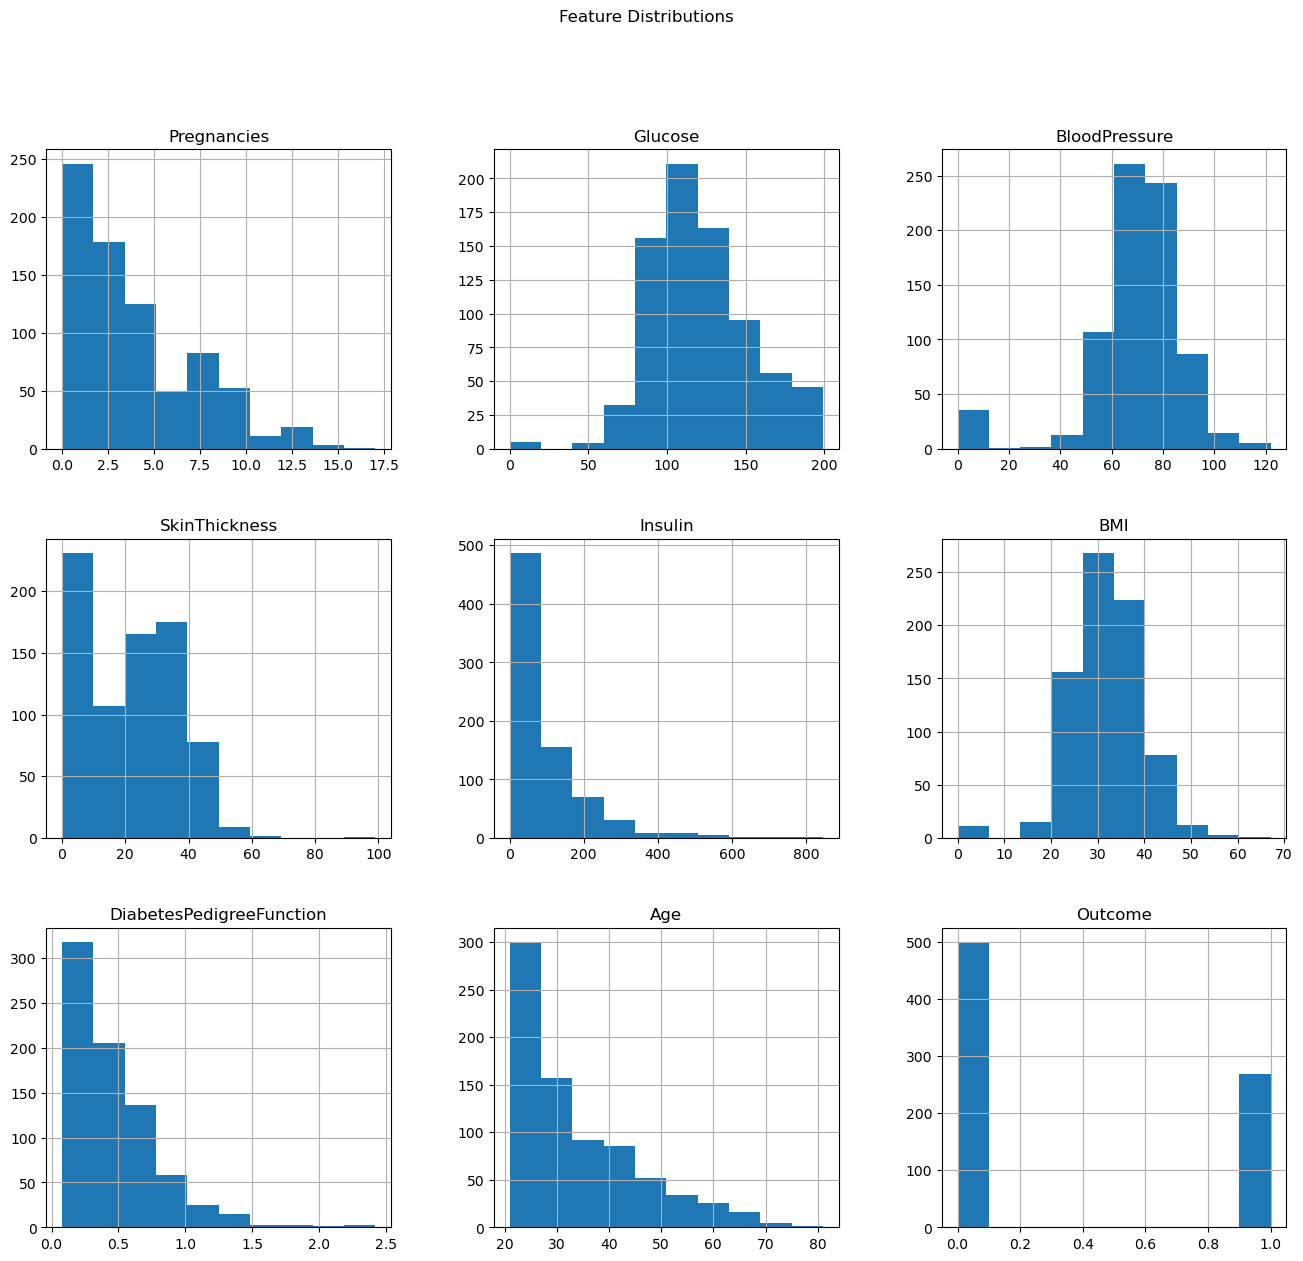

In [29]:
df.hist(figsize=(16, 14))
plt.suptitle('Feature Distributions')
plt.show()

Pair Plot

<Figure size 1600x1600 with 0 Axes>

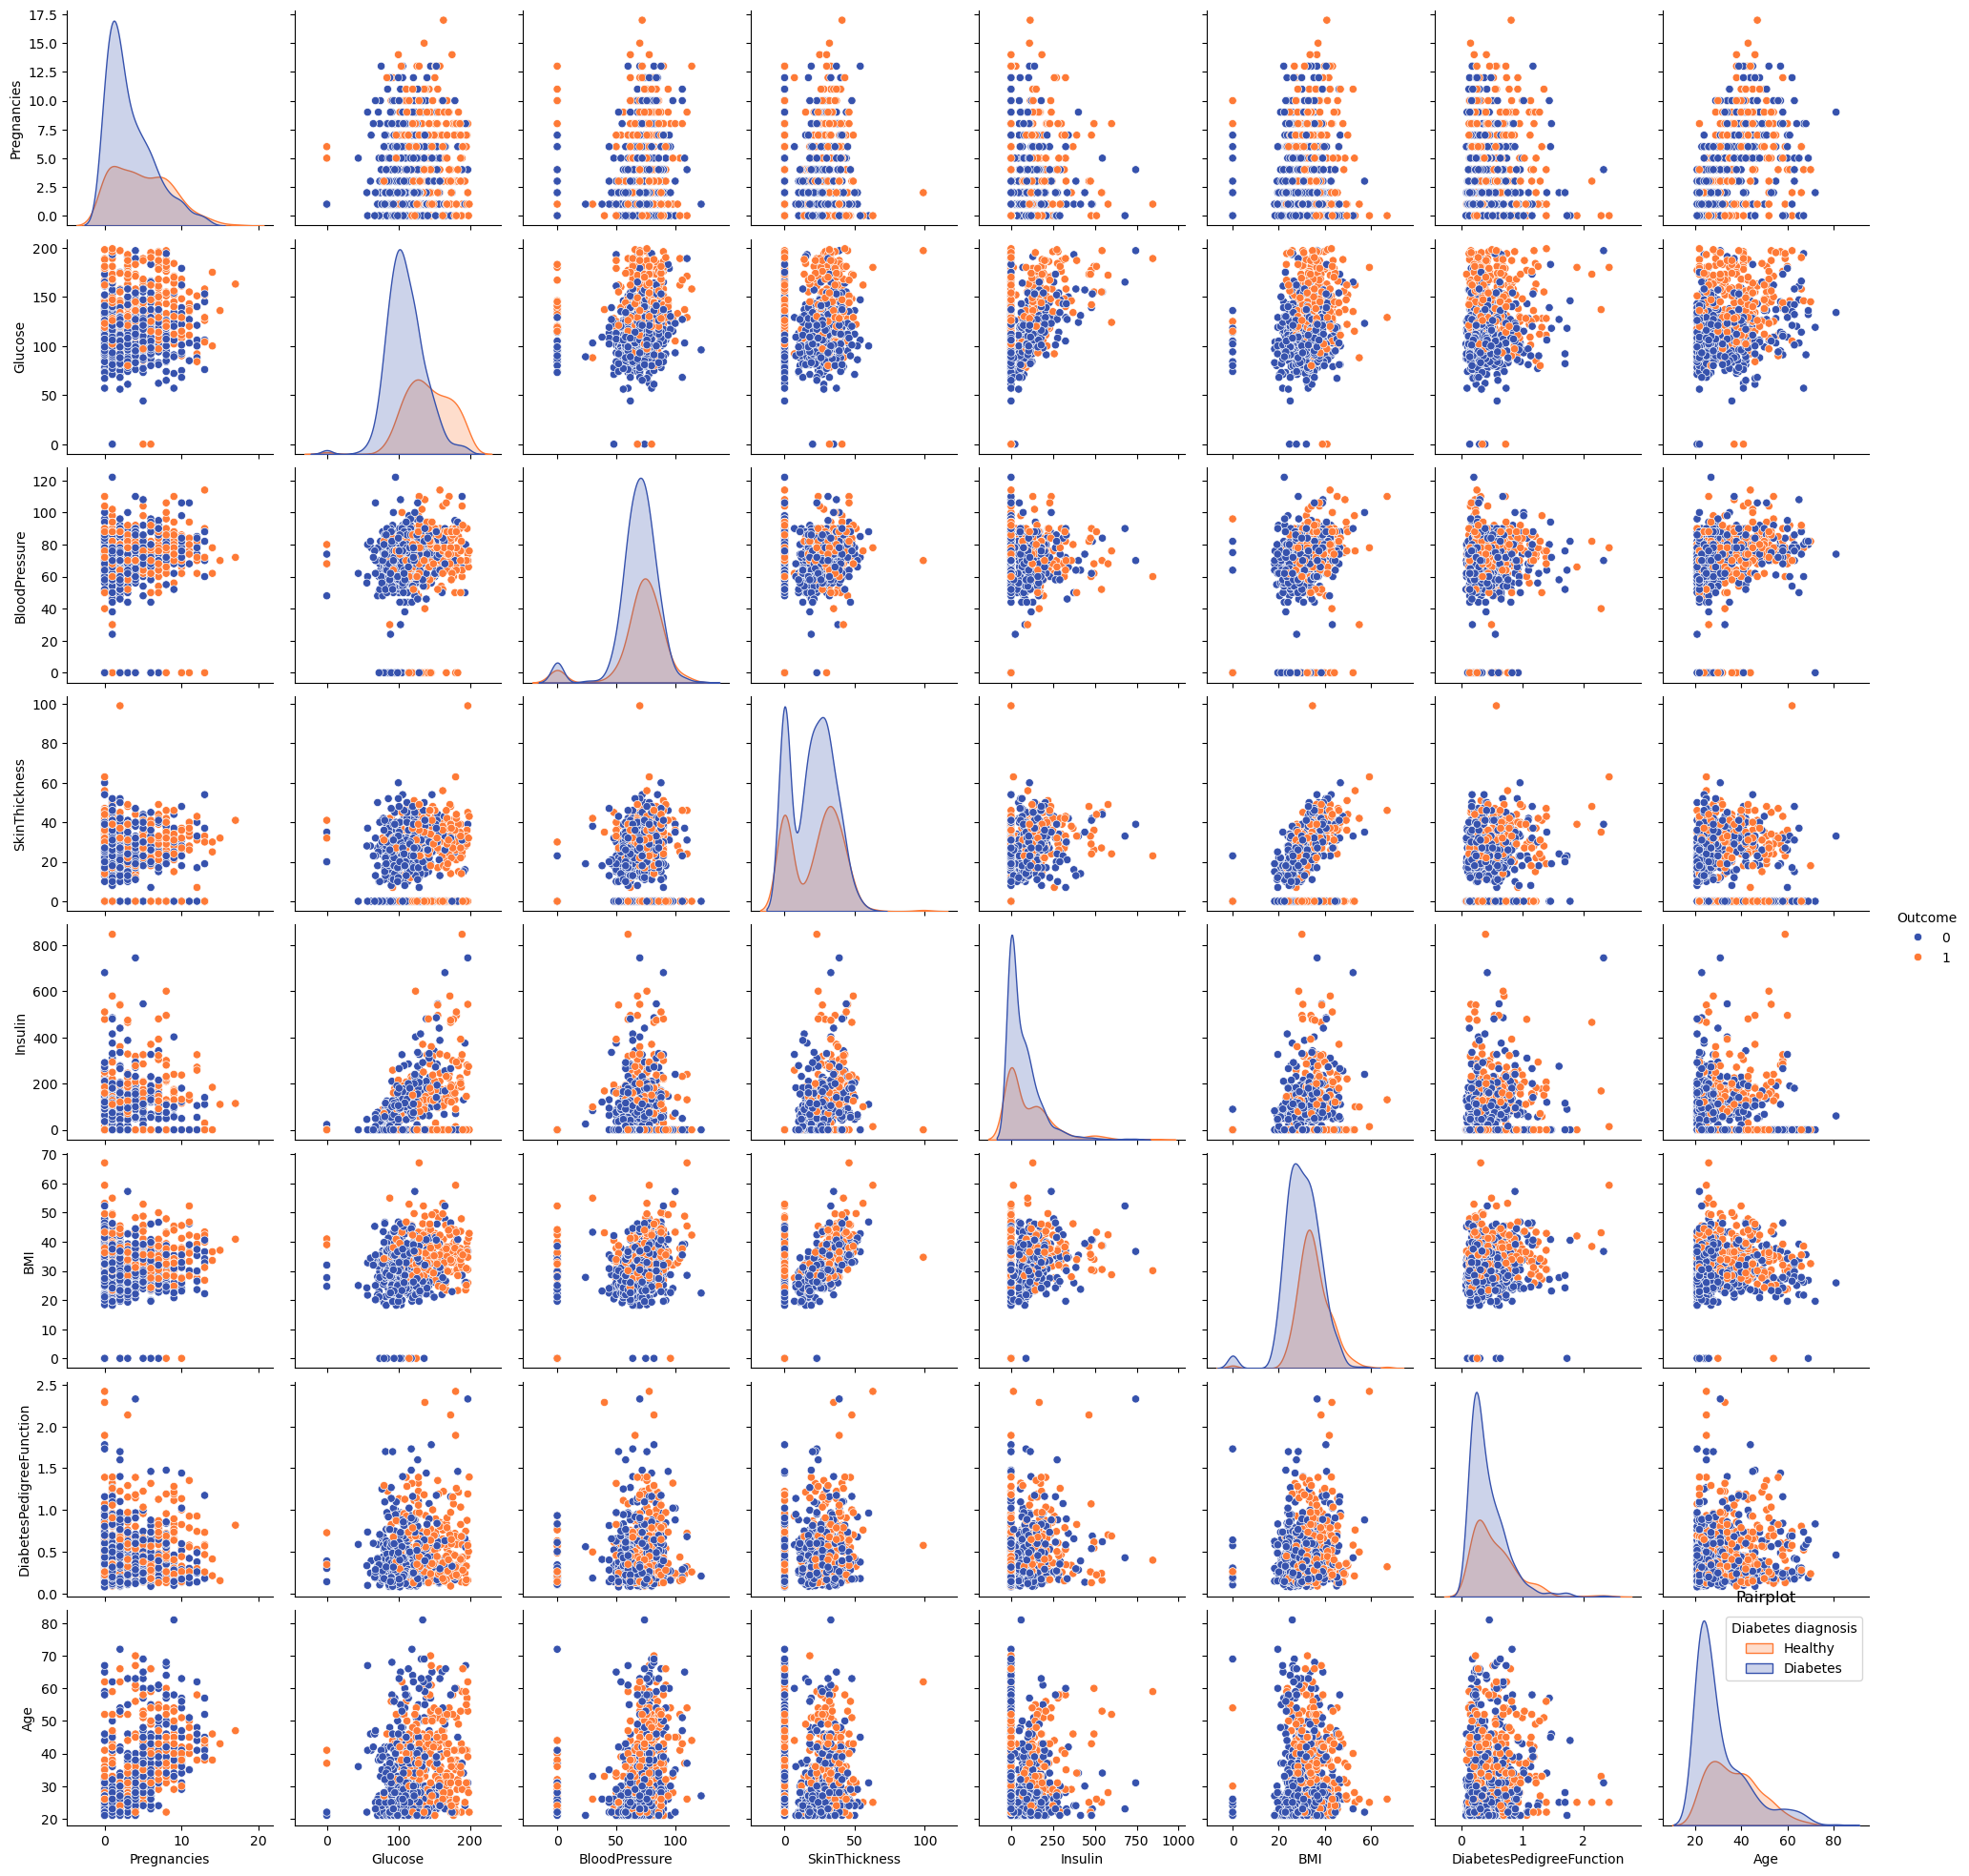

In [ ]:
sns.pairplot(
    df,
    hue='Outcome',
    palette=['#3652AD', '#FE7A36'],
)

Although the dataset contains no missing values, some entries are zero and appear to be implausible.

In [22]:
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

#### Age distribution

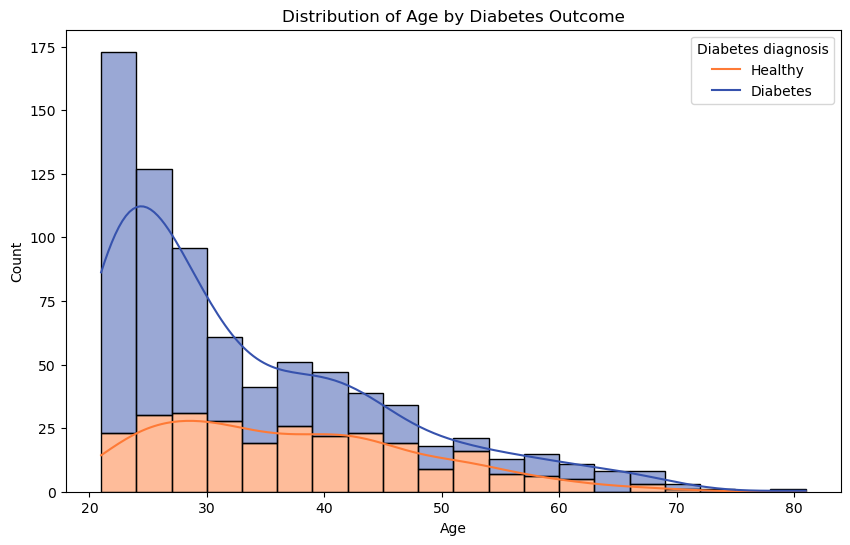

In [ ]:
plt.figure(
    figsize=(10, 6)
    )
sns.histplot(
    x='Age', 
    data=df, 
    bins=20, 
    kde=True, 
    hue='Outcome', 
    multiple='stack', 
    palette=['#3652AD', '#FE7A36']
    )

plt.title('Distribution of Age by Diabetes Outcome')
plt.legend(title='Diabetes diagnosis', labels=['Healthy', 'Diabetic'])
plt.show()

Based on the literature, the risk of diabetes increases after the age of 40. This section evaluates whether the same trend appears in our data.

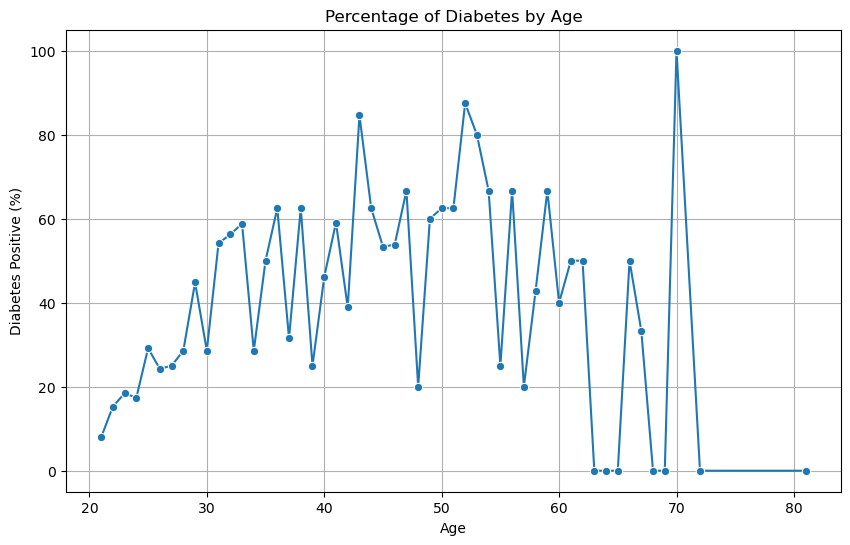

In [25]:
age_diabetes_pct = (
    df.groupby('Age')['Outcome'] 
    .mean()
    .reset_index()
)
age_diabetes_pct['Outcome'] *= 100

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=age_diabetes_pct,
    x='Age',
    y='Outcome',
    marker='o'
)

plt.ylabel('Diabetes Positive (%)')
plt.title('Percentage of Diabetes by Age')
plt.grid(True)
plt.show()

#### BMI distribution 

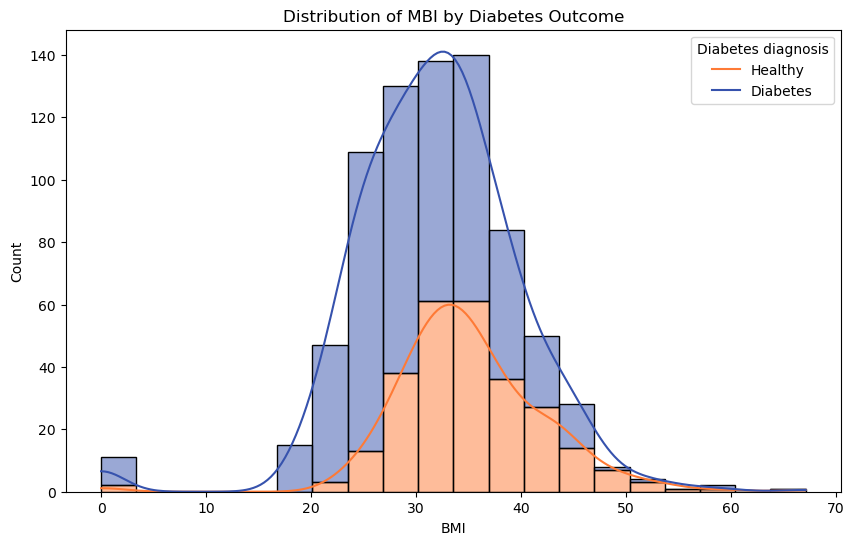

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='BMI', data=df, bins=20, kde=True, hue='Outcome', multiple='stack', palette=['#3652AD', '#FE7A36'])
plt.title('Distribution of BMI by Diabetes Outcome')
plt.legend(title='Diabetes diagnosis', labels=['Healthy', 'Diabetic'])
plt.show()

In [18]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

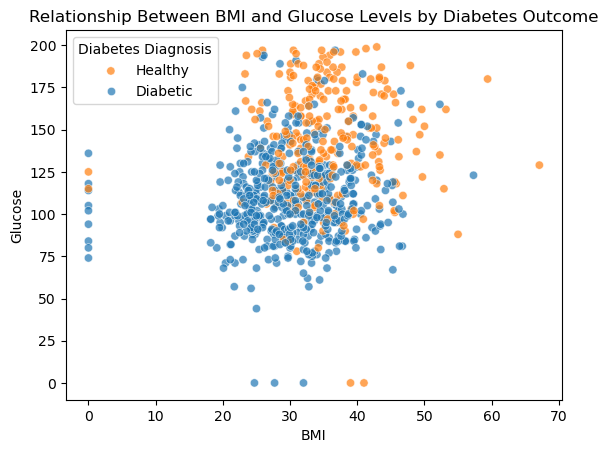

In [ ]:
sns.scatterplot(
    data=df,
    x="BMI",
    y="Glucose",
    hue="Outcome",
    alpha=0.7,
    )
plt.title("Relationship Between BMI and Glucose Levels by Diabetes Outcome")
plt.legend(title="Diabetes Diagnosis", labels=["Healthy", "Diabetic"])
plt.show()

#### Noise identification

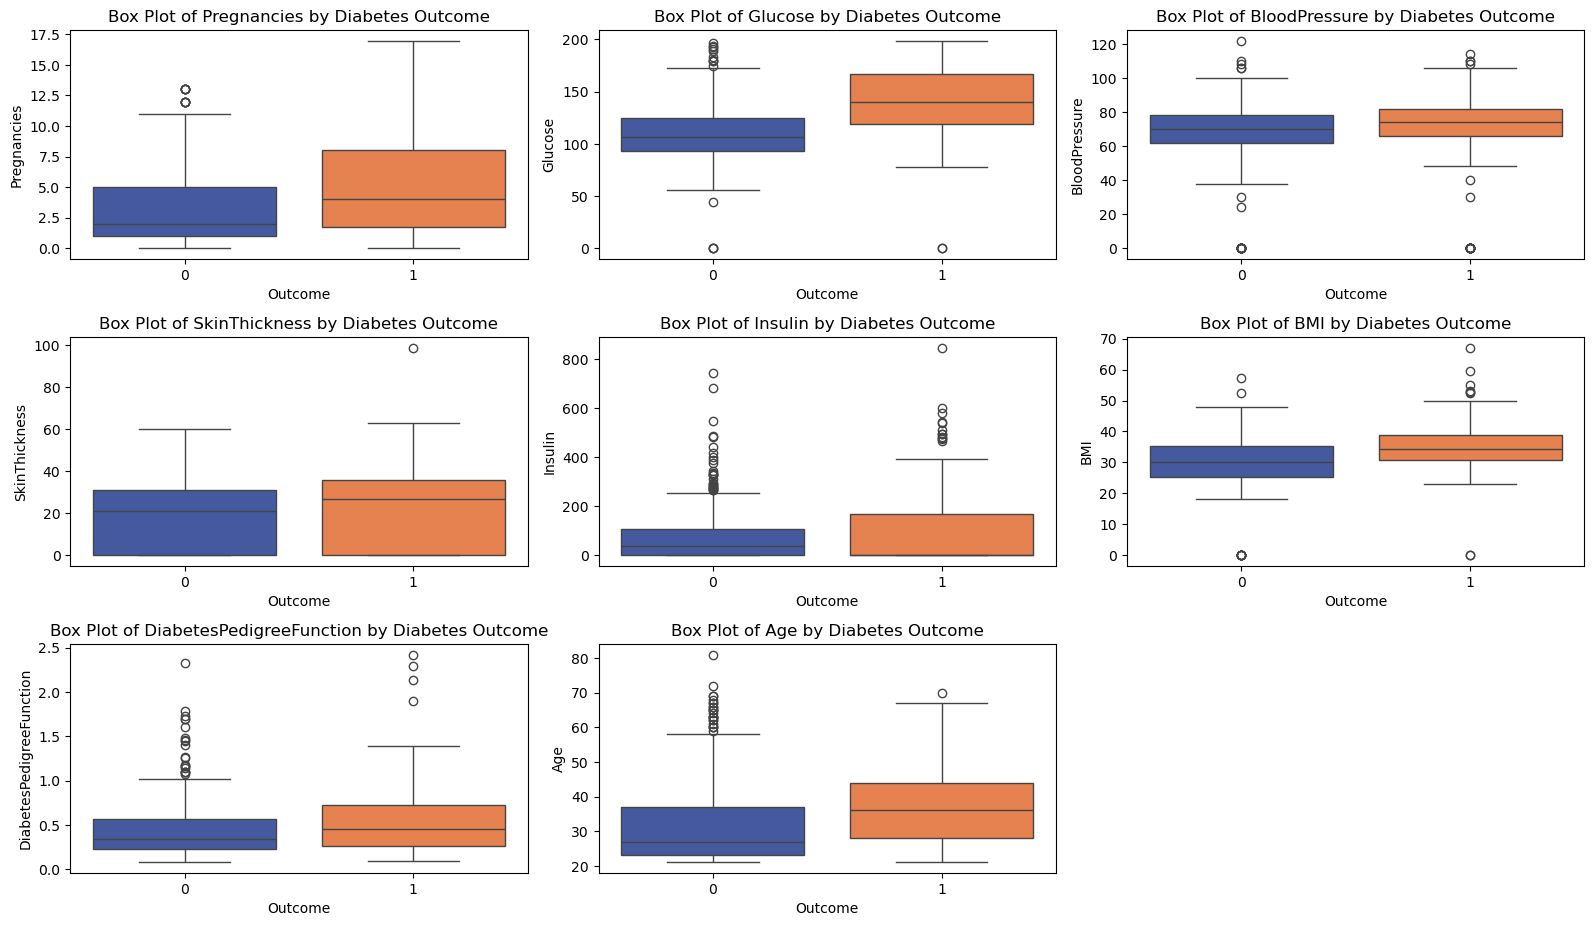

In [ ]:
numerical_features = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age'
]

plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='Outcome', y=feature, data=df, palette=['#3652AD', '#FE7A36'])
    plt.title(f'Box Plot of {feature} by Diabetes Outcome')

plt.tight_layout()
plt.show()

## 3. Data Preprocessing
Prepare the dataset for modeling by handling missing values, encoding categorical variables, scaling numerical features, and splitting into train/test sets.
*(Goal: Ensure data is clean and ready for machine learning models.)*

There are no categorical features in this dataset. If needed, categorical variables can be converted to numerical values using one‑hot encoding with `pd.get_dummies()`.

Split Blood Pressure into Systolic and Diastolic

In [42]:
valid_ranges = {
    'Pregnancies': (0, 20),
    'Glucose': (50, 200),
    'BloodPressure': (40, 130),
    'SkinThickness': (10, 99),
    'Insulin': (15, 600),
    'BMI': (15, 60),
    'DiabetesPedigreeFunction': (0.05, 2.5),
    'Age': (21, 90)
}

In [43]:
df_clean = df.copy()

for col, (min_val, max_val) in valid_ranges.items():
    df_clean.loc[
        (df_clean[col] < min_val) | (df_clean[col] > max_val),
        col
    ] = np.nan

In [44]:
df_clean.isna().sum()

Pregnancies                   0
Glucose                       6
BloodPressure                39
SkinThickness               231
Insulin                     378
BMI                          12
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
df_clean = df_clean.drop(columns=['Insulin']) # 50% missing values
df_clean['SkinThickness'] = df_clean['SkinThickness'].fillna(
    df_clean['SkinThickness'].median()
)
df_clean = df_clean.dropna().reset_index(drop=True)

In [52]:
df_clean.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [55]:
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape:  {df_clean.shape}")

Original dataset shape: (768, 9)
Cleaned dataset shape:  (718, 8)


Save preprocessed dataset

In [61]:
df_clean.to_csv("./data/diabetes_dataset_preprocessed.csv", index=False)

In [62]:
df = pd.read_csv("./data/diabetes_dataset_preprocessed.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,29.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...
713,10.0,101.0,76.0,48.0,32.9,0.171,63.0,0
714,2.0,122.0,70.0,27.0,36.8,0.340,27.0,0
715,5.0,121.0,72.0,23.0,26.2,0.245,30.0,0
716,1.0,126.0,60.0,29.0,30.1,0.349,47.0,1


#### Train and test dataset

In [63]:
df = pd.read_csv("./data/diabetes_dataset_preprocessed.csv")

X = df.drop('Outcome', axis=1)
y = df['Outcome']

Always split the data into training and test sets before standardizing the features, to avoid data leakage

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [89]:
X_train_scaled

array([[-0.55333776,  0.63997087, -1.20626208, ..., -1.01194789,
         0.71468334, -0.78611283],
       [-1.16238067,  1.82282936, -1.03962082, ...,  0.33225898,
         1.86367851, -1.0407566 ],
       [ 0.3602266 ,  0.01568444,  1.12671556, ...,  0.34686993,
        -0.5452068 , -0.02218151],
       ...,
       [-1.16238067, -1.4300315 ,  1.29335682, ...,  0.6683107 ,
        -0.10162689, -1.0407566 ],
       [-1.16238067, -0.80574507, -0.7063383 , ...,  0.65369976,
         0.40972216, -0.70123157],
       [-0.85785922, -1.06860251,  0.29350926, ..., -0.16451312,
        -0.84708756, -0.87099409]], shape=(574, 7))

In [90]:
print(f'Length of training data: {len(X_train_scaled)}')
print(f'Length of test data: {len(X_test_scaled)}')

Length of training data: 574
Length of test data: 144


## 4. Model Selection & Training
Train multiple baseline models (e.g., Logistic Regression, Random Forest, XGBoost) to compare their performance.  
*(Goal: Identify which algorithms work best for this dataset.)*

### Models

In [91]:
metrics = []

### Logistic Regression
Logistic Regression is a statistical method used for binary classification problems, where the outcome variable is categorical and has two classes. In simpler terms, it's like fitting a line to predict whether something is in one category or another.

Define model and fit it to data

In [92]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Make prediction

In [93]:
y_pred = model_lr.predict(X_test_scaled)

Model evaluation

In [94]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score

print('Classification Report:\n', classification_report(y_test, y_pred))

metrics.append({
    "model": "LogisticRegression",
    "accuracy": accuracy_score(y_test, y_pred),
    "f1-score": f1_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred)
})

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82        92
           1       0.70      0.62      0.65        52

    accuracy                           0.76       144
   macro avg       0.75      0.73      0.74       144
weighted avg       0.76      0.76      0.76       144



Confusion matrix

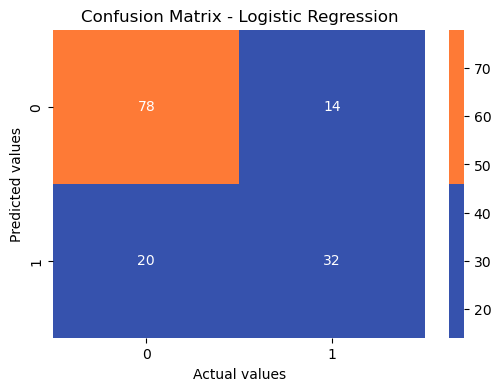

In [95]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap=sns.color_palette(['#3652AD', '#FE7A36']))
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

### Random Forest
Random Forest is a versatile and powerful machine learning algorithm. Think of it as a collection of decision trees working together to make predictions. Each tree in the forest is trained on a different subset of the data and makes its own prediction. When you want to make a prediction, each tree votes on the outcome, and the majority vote becomes the final prediction. This ensemble approach often results in more accurate and robust predictions compared to individual decision trees, making Random Forest a popular choice for various predictive tasks.

Define model and fit it to data

In [96]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Make prediction

In [97]:
y_pred = model_rf.predict(X_test_scaled)

Model evaluation

In [98]:
print('Classification Report:\n', classification_report(y_test, y_pred))

metrics.append({
    "model": "RandomForest",
    "accuracy": accuracy_score(y_test, y_pred),
    "f1-score": f1_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred)
})

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80        92
           1       0.65      0.62      0.63        52

    accuracy                           0.74       144
   macro avg       0.72      0.72      0.72       144
weighted avg       0.74      0.74      0.74       144



Confusion matrix

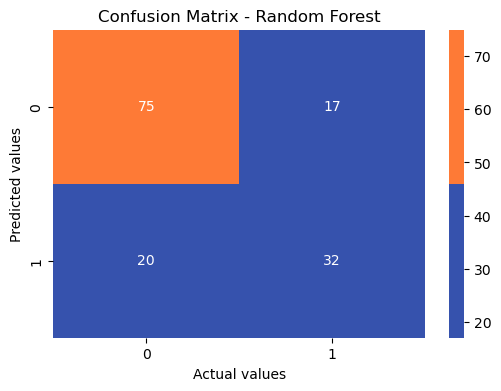

In [99]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap=sns.color_palette(['#3652AD', '#FE7A36']))
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

### Support Vector Machine (SVM)
Support Vector Machine (SVM) is a machine learning algorithm that excels classification and regression tasks. Picture it as a line or boundary that best separates different groups in your data.

For classification, SVM aims to draw a line (or hyperplane in higher dimensions) in such a way that it maximizes the margin between different classes. The "support vectors" are the data points that are closest to the decision boundary.

Define model and fit it to data

In [100]:
from sklearn.svm import SVC

model_svm = SVC(kernel='linear', random_state=42)
model_svm.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Make prediction

In [101]:
y_pred = model_svm.predict(X_test_scaled)

Model evaluation

In [102]:
print('Classification Report:\n', classification_report(y_test, y_pred))

metrics.append({
    "model": "SVM",
    "accuracy": accuracy_score(y_test, y_pred),
    "f1-score": f1_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred)
})

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82        92
           1       0.70      0.60      0.65        52

    accuracy                           0.76       144
   macro avg       0.75      0.73      0.73       144
weighted avg       0.76      0.76      0.76       144



Confusion matrix

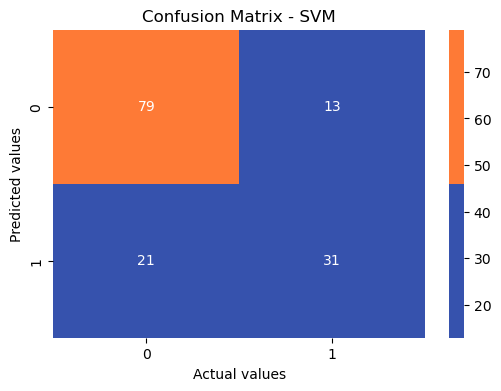

In [103]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap=sns.color_palette(['#3652AD', '#FE7A36']))
plt.title('Confusion Matrix - SVM')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

### K-Nearest Neighbors

K-Nearest Neighbors (KNN) is a straightforward and intuitive machine learning algorithm. Imagine you have a dataset with points on a graph. To predict the class of a new point, KNN looks at the 'k' nearest existing points to it. The majority class among those neighbors determines the class of the new point.

Define model and fit it to data

In [104]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Make prediction

In [105]:
y_pred = model_knn.predict(X_test_scaled)

Model evaluation

In [106]:
print('Classification Report:\n', classification_report(y_test, y_pred))

metrics.append({
    "model": "KNN",
    "accuracy": accuracy_score(y_test, y_pred),
    "f1-score": f1_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred)
})

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78        92
           1       0.62      0.56      0.59        52

    accuracy                           0.72       144
   macro avg       0.69      0.68      0.68       144
weighted avg       0.71      0.72      0.71       144



Confusion matrix

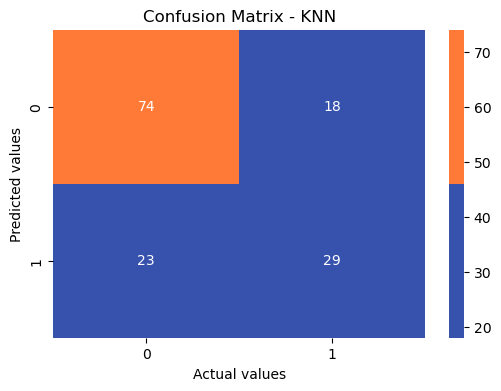

In [107]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap=sns.color_palette(['#3652AD', '#FE7A36']))
plt.title('Confusion Matrix - KNN')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

## 5. Model Evaluation
Evaluate models using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. Use confusion matrices and plots to interpret results.  
*(Goal: Understand strengths and weaknesses of each model.)*

### Models summary

In [108]:
evaluation = pd.DataFrame(metrics)
evaluation

,model,accuracy,f1-score,recall,precision
0,LogisticRegression,0.763889,0.653061,0.615385,0.695652
1,RandomForest,0.743056,0.633663,0.615385,0.653061
2,SVM,0.763889,0.645833,0.596154,0.704545
3,KNN,0.715278,0.585859,0.557692,0.617021


## 6. Advanced Machine Learning Techniques
To further improve model performance beyond the baseline, more advanced machine learning techniques can be applied. Although these methods are outside the scope of this workshop, the following keywords are provided to guide further independent study.

### 6.1 Hyperparameter Tuning
Use techniques such as Grid Search, Random Search, or Bayesian Optimization to find the best parameters for chosen models.  
*(Goal: Optimize models for better accuracy and generalization.)*

### 6.2 Ensemble Learning
Apply methods like Bagging, Boosting, and Stacking to combine multiple models for stronger performance.  
*(Goal: Leverage the power of multiple models to reduce bias/variance.)*